In [1]:
import pandas as pd
import geopandas as gpd

# Decode Surveillance GeoPandas choropleth test

## Load adjusted intersection/camera counts data (three boroughs; excludes parks)

In [2]:
df_intersections_adj = (
    pd.read_csv(
        "data/processed/camera-medians-2021-05-19-total-medians-by-nta.csv"
    )
    .query(
        "BoroName in ['Bronx', 'Brooklyn', 'Manhattan'] & NTACode not in ['BK99', 'BX98', 'BX99', 'MN99']"
    )
    .sort_values("NTACode")
    .reset_index(drop=True)
)

df_intersections_adj.info()
df_intersections_adj.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BoroCode   114 non-null    int64 
 1   BoroName   114 non-null    object
 2   NTACode    114 non-null    object
 3   NTAName    114 non-null    object
 4   NUMPOINTS  114 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.6+ KB


,BoroCode,BoroName,NTACode,NTAName,NUMPOINTS
0,3,Brooklyn,BK09,Brooklyn Heights-Cobble Hill,56
1,3,Brooklyn,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,215
2,3,Brooklyn,BK19,Brighton Beach,94
3,3,Brooklyn,BK21,Seagate-Coney Island,94
4,3,Brooklyn,BK23,West Brighton,13


## Load NTAs shapefile

In [3]:
gdf_ntas = gpd.read_file(
    "data/raw/nynta.shp"
)

gdf_ntas.info()
gdf_ntas.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BoroCode    195 non-null    int64   
 1   BoroName    195 non-null    object  
 2   CountyFIPS  195 non-null    object  
 3   NTACode     195 non-null    object  
 4   NTAName     195 non-null    object  
 5   Shape_Leng  195 non-null    float64 
 6   Shape_Area  195 non-null    float64 
 7   geometry    195 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 12.3+ KB


,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16..."


## Join to adjusted intersection/camera counts

In [4]:
gdf_ntas_joined = gdf_ntas.merge(
    df_intersections_adj[["NTACode", "NUMPOINTS"]], how="inner", on="NTACode"
)

gdf_ntas_joined.info()
gdf_ntas_joined.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BoroCode    114 non-null    int64   
 1   BoroName    114 non-null    object  
 2   CountyFIPS  114 non-null    object  
 3   NTACode     114 non-null    object  
 4   NTAName     114 non-null    object  
 5   Shape_Leng  114 non-null    float64 
 6   Shape_Area  114 non-null    float64 
 7   geometry    114 non-null    geometry
 8   NUMPOINTS   114 non-null    int64   
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 8.9+ KB


,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,NUMPOINTS
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",305
1,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16...",89
2,3,Brooklyn,047,BK44,Madison,26237.257858,2.737916e+07,"POLYGON ((1001593.410 160996.441, 1001382.708 ...",48
3,3,Brooklyn,047,BK41,Kensington-Ocean Parkway,20800.752358,1.589331e+07,"POLYGON ((992341.696 174770.869, 992361.536 17...",77
4,3,Brooklyn,047,BK95,Erasmus,18756.702033,1.452260e+07,"POLYGON ((998608.334 171942.436, 998339.702 17...",106


## Plot choropleth and save to .jpg

<AxesSubplot:>

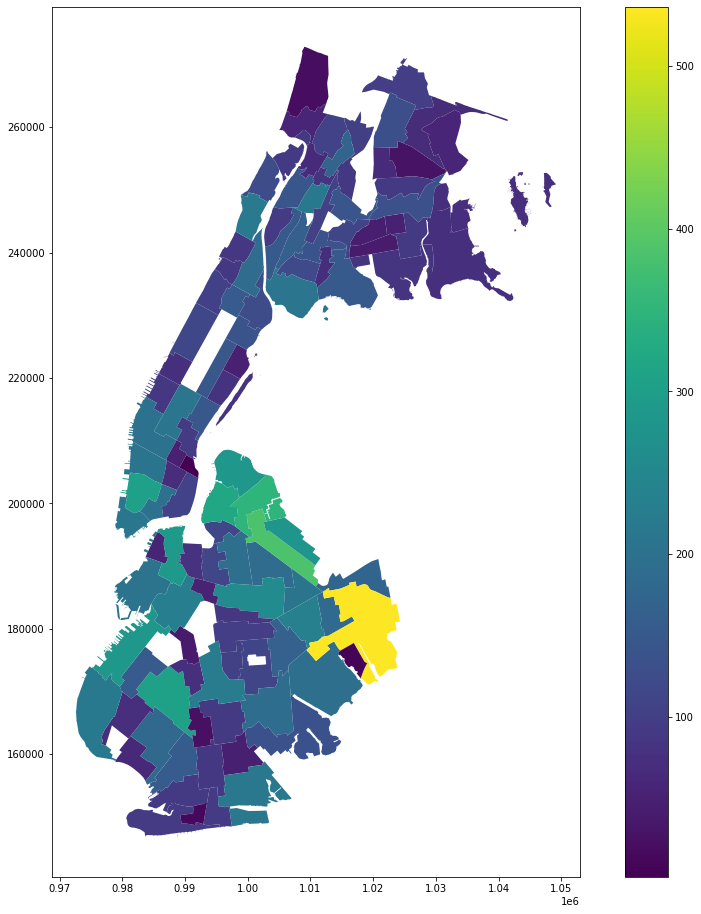

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 16))

gdf_ntas_joined.plot(column="NUMPOINTS", ax=ax, legend=True)
plt.savefig('choropleth.jpg')